In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model10_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : nn.MaxPool2d(2),
    post_conv=post_conv0,
    ratio = 1
)
he_initialization(model10_0)
describe(model10_0)

MACs: 25.62 MMac, Params: 4.79 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─MaxPool2d: 2-3                    [1, 20, 64, 64]           --
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-3             [1, 10, 64, 64]           20
│    │    └─PReLU: 3-4                   [1, 10, 64, 64]           1
├─Sequential: 1-3                        [1, 1, 16

Loading checkpoint from model_weights/model10_0.pt
Starting
Epoch 1/10: Train loss = 0.5887, Train accuracy = 0.6894, Test loss = 0.5927, Test accuracy = 0.6814


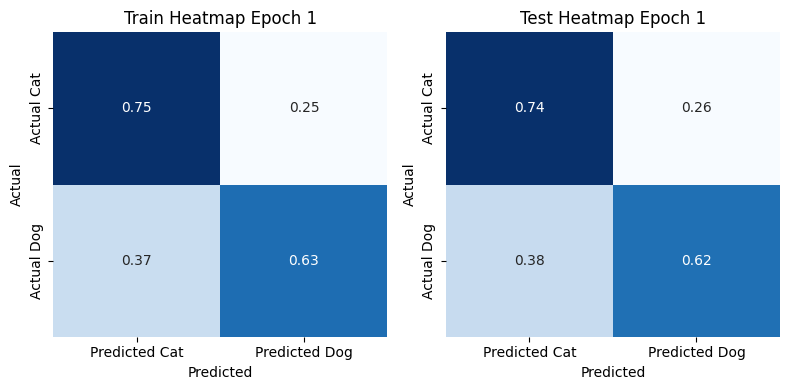

Epoch 2/10: Train loss = 0.5372, Train accuracy = 0.7349, Test loss = 0.5518, Test accuracy = 0.7223


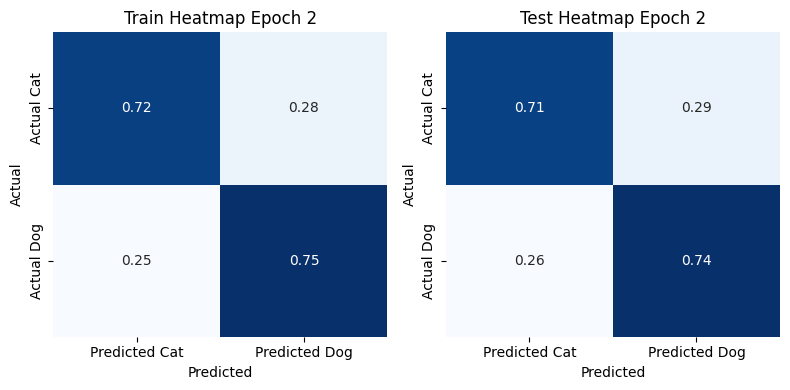

Epoch 3/10: Train loss = 0.4980, Train accuracy = 0.7594, Test loss = 0.5169, Test accuracy = 0.7401


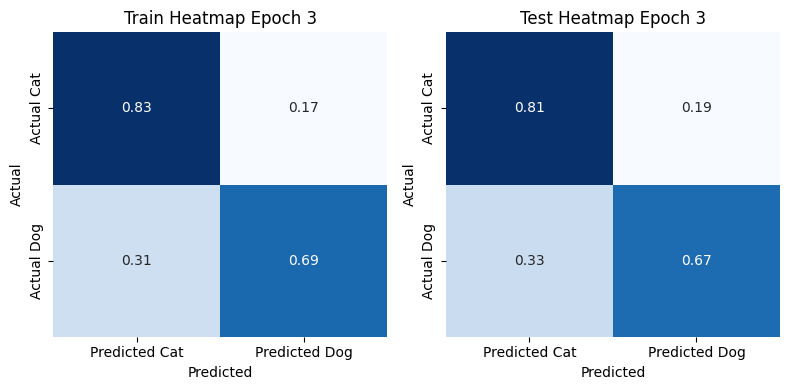

Epoch 4/10: Train loss = 0.4728, Train accuracy = 0.7762, Test loss = 0.5003, Test accuracy = 0.7578


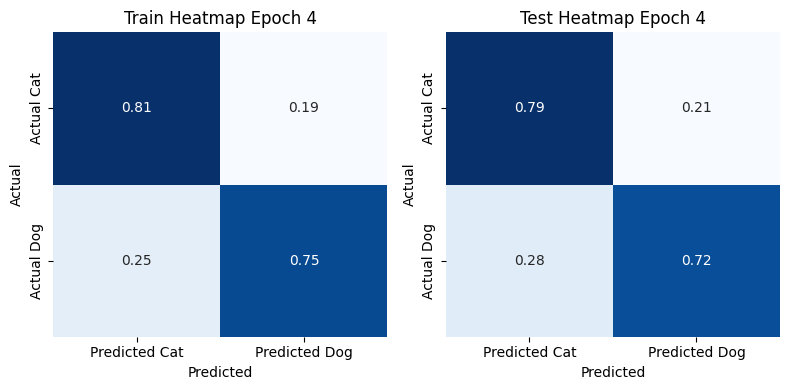

Epoch 5/10: Train loss = 0.4442, Train accuracy = 0.7930, Test loss = 0.4668, Test accuracy = 0.7780


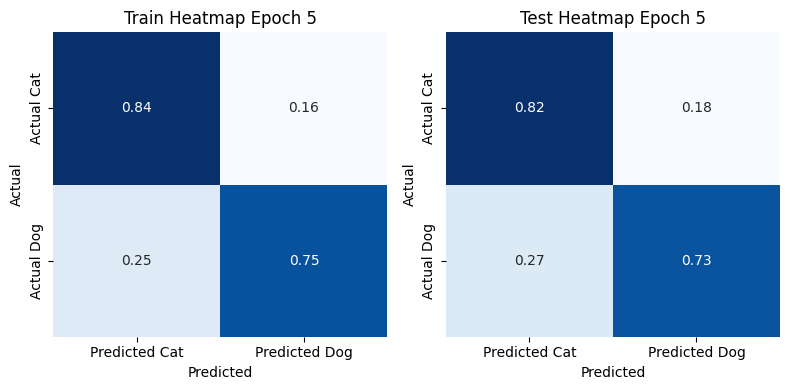

Epoch 6/10: Train loss = 0.4309, Train accuracy = 0.7993, Test loss = 0.4585, Test accuracy = 0.7856


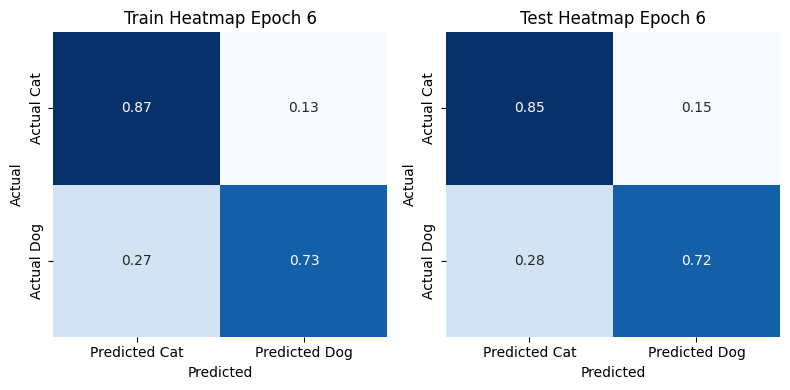

Epoch 7/10: Train loss = 0.4272, Train accuracy = 0.8011, Test loss = 0.4529, Test accuracy = 0.7884


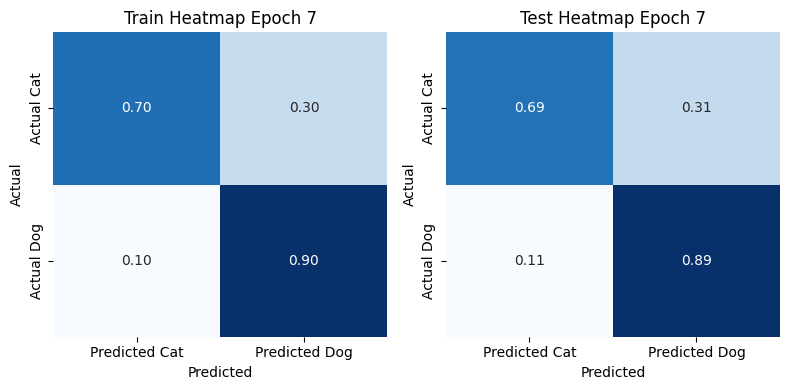

Epoch 8/10: Train loss = 0.3992, Train accuracy = 0.8193, Test loss = 0.4314, Test accuracy = 0.8038


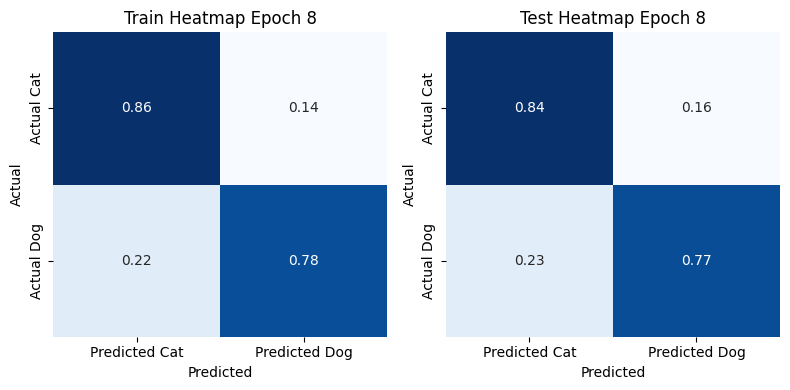

Epoch 9/10: Train loss = 0.3878, Train accuracy = 0.8282, Test loss = 0.4263, Test accuracy = 0.8037


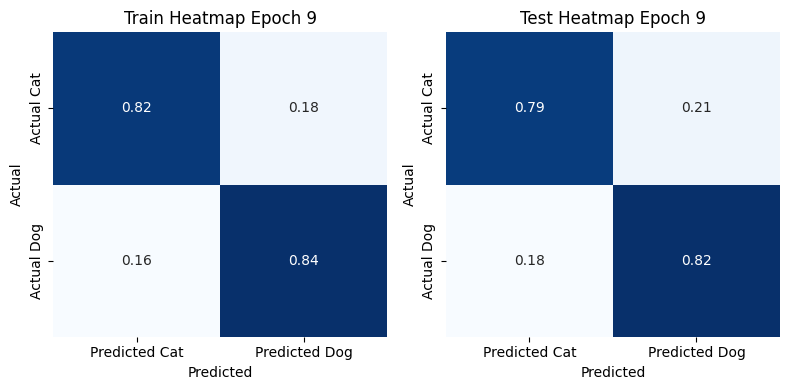

Epoch 10/10: Train loss = 0.3936, Train accuracy = 0.8211, Test loss = 0.4331, Test accuracy = 0.7981


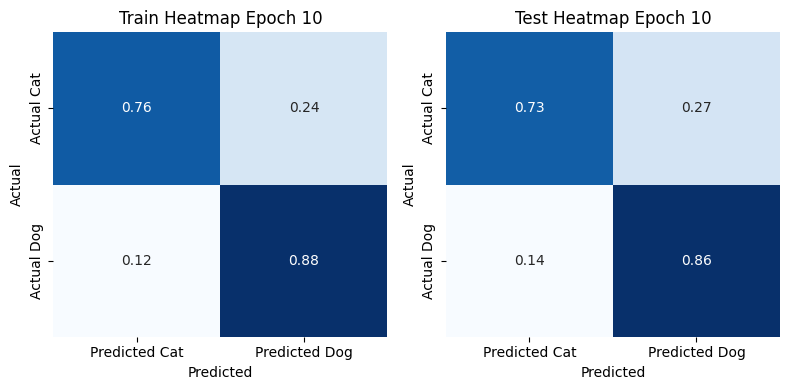

Training complete.


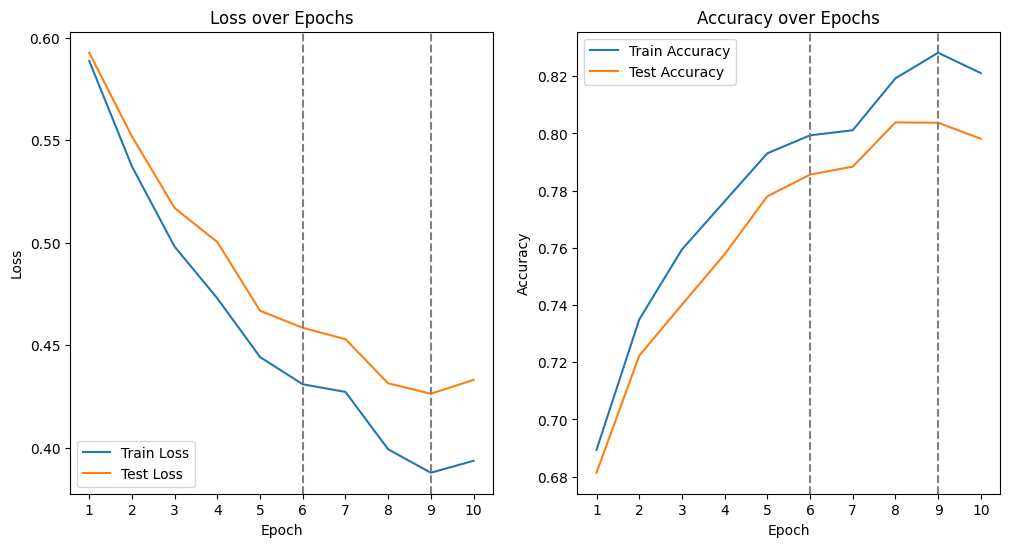

In [5]:
train(model10_0,"model_weights/model10_0.pt",criterion,train_dataset,test_dataset)